<a href="https://colab.research.google.com/github/Shatha-1/IT326-Project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 0: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
print("Step 1: Importing the dataset...")
dataset_path = "Depression Student Dataset.csv"

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")
        return None

df = load_dataset()

if df is not None:
    # Step 2: Dataset Overview
    print("\nStep 2: Understanding the Dataset")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("Column names:", df.columns.tolist())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values Before Handling:")
    print(df.isnull().sum())

    # Step 3: Numeric Analysis (Five-number summary, Boxplots, Outliers)
    print("\nStep 3: Numeric Analysis")
    print("Performing statistical analysis on numeric attributes to better understand their distribution.")

    # Identify numeric columns
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print("Numeric features detected:", numeric_features)

    # ---- Five-number summary ----
    print("\nFive-number summary for each numeric feature:")
    five_num_summary = df[numeric_features].describe(percentiles=[0.25,0.5,0.75]).T[['min','25%','50%','75%','max']]
    print(five_num_summary)

    # ---- Boxplots ----
    print("\nGenerating boxplots for numeric features to visualize distributions and detect outliers.")
    for col in numeric_features:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()




    # ---- Outlier detection using IQR ----
    print("\nDetecting outliers using the IQR method:")
    outliers = {}
    for col in numeric_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers[col] = outlier_values
        print(f"\nColumn: {col}")
        if outlier_values.empty:
            print("  No outliers detected.")
        else:
            print(f"  Number of outliers: {len(outlier_values)}")
            print("  Example values:", outlier_values.head().tolist())


Step 1: Importing the dataset...
Could not find the dataset at: Depression Student Dataset.csv. Please check the file name and path.


## 📊 Visualization — Numeric Attributes


In [ ]:
!pip -q install kagglehub
import kagglehub, os, pandas as pd

# هنا اضطريت ارجع احمل الملف تبع الداتا لانه ماطلع لي
path = kagglehub.dataset_download("ikynahidwin/depression-student-dataset")
csv_path = os.path.join(path, "Depression Student Dataset.csv")

df = pd.read_csv(csv_path)
print("Loaded:", csv_path, " | shape:", df.shape)


100%|██████████| 4.25k/4.25k [00:00<00:00, 5.77MB/s]

Extracting files...
Loaded: /root/.cache/kagglehub/datasets/ikynahidwin/depression-student-dataset/versions/1/Depression Student Dataset.csv  | shape: (502, 11)


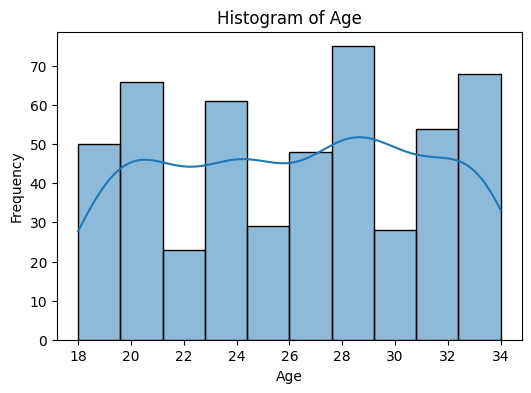

In [ ]:
# Histogram for Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


 Analysis (Age):  
The students are distributed between ages 18 and 34, with peaks around 20–21, 28–29, and 32–33.  
The data shows a relatively balanced spread but with some noticeable clusters at specific ages.  
This indicates that the dataset mainly represents young adults and does not require major cleaning for the Age attribute.


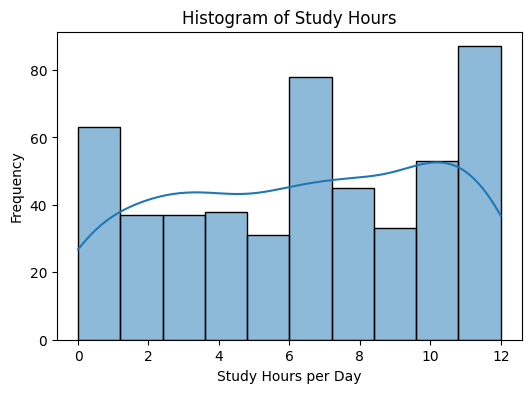

In [ ]:
# Histogram for Study Hours
plt.figure(figsize=(6,4))
sns.histplot(df['Study Hours'], bins=10, kde=True)
plt.title('Histogram of Study Hours')
plt.xlabel('Study Hours per Day')
plt.ylabel('Frequency')
plt.show()


 Analysis (Study Hours):  
Most students study between 0 and 12 hours daily.  
There are clear peaks at 0 hours (students not studying) and at 10–12 hours (students studying excessively).  
This suggests the presence of potential outliers or unusual data points at the extremes.


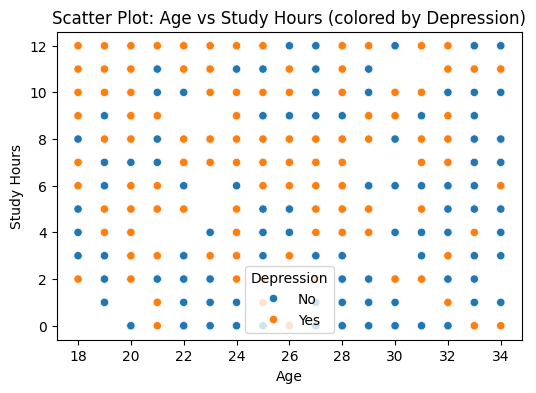

In [ ]:
# Scatter plot: Age vs Study Hours
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Study Hours', hue='Depression', data=df)
plt.title('Scatter Plot: Age vs Study Hours (colored by Depression)')
plt.xlabel('Age')
plt.ylabel('Study Hours')
plt.show()


 Analysis (Scatter Plot):  
The scatter plot shows no strong linear relationship between age and study hours.  
Students with "Depression = Yes" and "Depression = No" appear across almost all ages and study levels.  
This suggests that other factors (e.g., Academic Pressure or Sleep Duration) may play a more significant role in predicting depression.


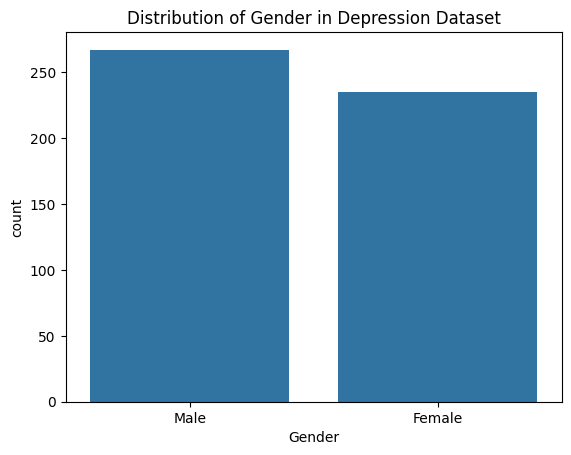

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender in Depression Dataset')
plt.show()

Bar Plot – Gender
The gender distribution shows 267 male students and 235 female students. The dataset is relatively balanced in terms of gender, which is beneficial for analysis.

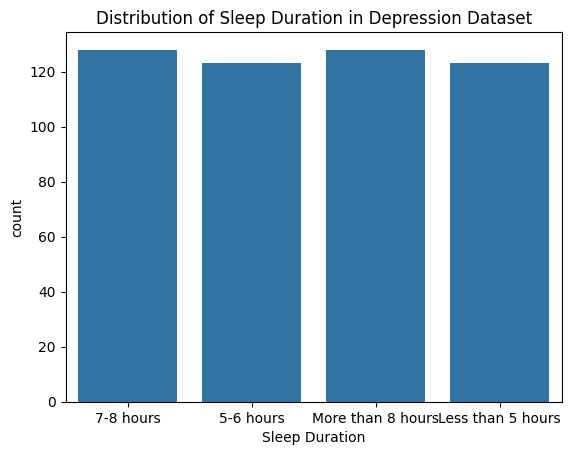

In [ ]:
sns.countplot(x='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration in Depression Dataset')
plt.show()

Bar Plot – Sleep Duration
The distribution of sleep duration is fairly balanced across the four categories: less than 5 hours (123), 5–6 hours (123), 7–8 hours (128), and more than 8 hours (128). This balanced distribution helps in ensuring fair comparison between categories.

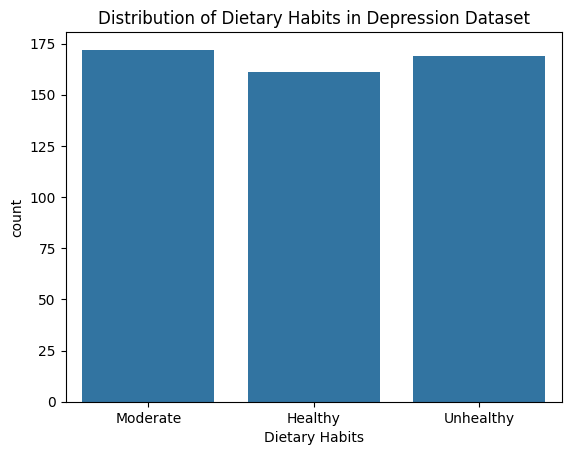

In [ ]:
sns.countplot(x='Dietary Habits', data=df)
plt.title('Distribution of Dietary Habits in Depression Dataset')

plt.show()

Bar Plot – Dietary Habits
The dietary habits of students are distributed among three categories: Moderate (172), Unhealthy (169), and Healthy (161). The near balance among categories indicates diverse eating habits in the dataset.

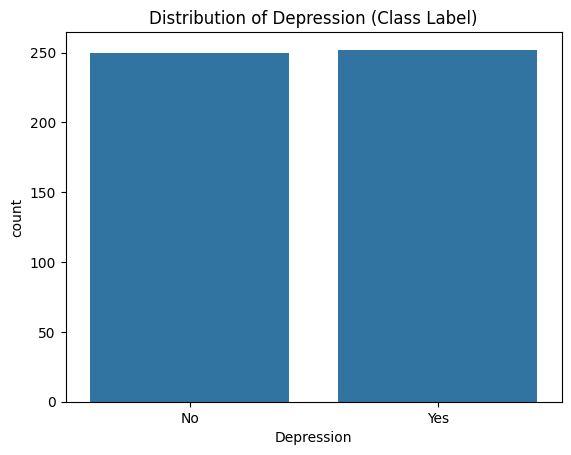

In [ ]:
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression (Class Label)')
plt.show()

Bar Plot – Depression (Class Label)
The class label distribution is almost perfectly balanced, with 252 students labeled “Yes” for depression and 250 labeled “No.” This balance reduces the risk of bias during classification tasks.

#**Label Encoding**
We applied label encoding to convert categorical values into numeric form.

#**Normalization**
We used a Min–Max scaler to rescale all numerical features to a [0, 1] range while keeping their original distribution shape.